# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load dataset

In [2]:
#Load data
company = "FB"

start = dt.datetime(2013,1,1)
end = dt.datetime(2020,1,1)

In [3]:
data = web.DataReader(company,"yahoo",start,end)

# Data Preparation

In [4]:
#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

In [5]:
prediction_days = 60

#Define x_train and y_train
x_train = []
y_train = []

#Loop for training datas
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))   

# Model Preparation

In [6]:
#Build the model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

#Prediction of the next closing layer
model.add(Dense(units = 1)) 

#Compiling the model and use adam optimizer for better result
model.compile(optimizer = "adam",loss = "mean_squared_error")
model.fit(x_train,y_train,epochs = 25, batch_size =32)

Epoch 1/25
54/54 [==============================] - 11s 68ms/step - loss: 0.0714
Epoch 2/25
54/54 [==============================] - 4s 73ms/step - loss: 0.0051
Epoch 3/25
54/54 [==============================] - 4s 71ms/step - loss: 0.0040
Epoch 4/25
54/54 [==============================] - 5s 87ms/step - loss: 0.0036
Epoch 5/25
54/54 [==============================] - 4s 72ms/step - loss: 0.0038
Epoch 6/25
54/54 [==============================] - 4s 68ms/step - loss: 0.0036
Epoch 7/25
54/54 [==============================] - 4s 67ms/step - loss: 0.0040
Epoch 8/25
54/54 [==============================] - 4s 66ms/step - loss: 0.0044
Epoch 9/25
54/54 [==============================] - 4s 67ms/step - loss: 0.0032
Epoch 10/25
54/54 [==============================] - 5s 85ms/step - loss: 0.0034
Epoch 11/25
54/54 [==============================] - 5s 84ms/step - loss: 0.0029
Epoch 12/25
54/54 [==============================] - 4s 68ms/step - loss: 0.0030
Epoch 13/25
54/54 [=================

# Load Test Data

In [7]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company,"yahoo",test_start,test_end)
actual_prices = test_data["Close"].values

total_dataset = pd.concat((data["Close"],test_data["Close"]),axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

# Make Prediction on Test Data

In [8]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Display result on Plot

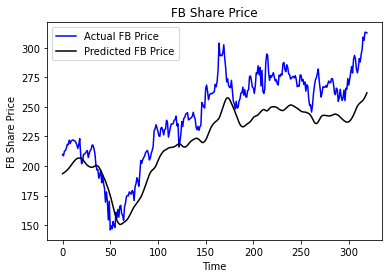

In [9]:
plt.plot(actual_prices,color = "blue",label = f"Actual {company} Price")
plt.plot(predicted_prices,color = "black",label = f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

# Predict next day

In [11]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[263.7373]]
